Sure, here's the text you provided organized in markdown format:

# Project: Visualizing Time Series Data

In this project, you will visualize time series data using Python libraries like Pandas, Matplotlib, and Seaborn. The dataset contains the number of page views each day on the freeCodeCamp.org forum from May 9, 2016, to December 3, 2019. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

## Tasks

1. **Import and Clean Data**
    - Use Pandas to import the data from "fcc-forum-pageviews.csv."
    - Set the index to the date column.
    - Clean the data by filtering out days when the page views were in the top 2.5% or bottom 2.5% of the dataset.

2. **Draw Line Plot**
    - Create a `draw_line_plot` function that uses Matplotlib to draw a line chart.
    - The title of the chart should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019."
    - The x-axis label should be "Date," and the y-axis label should be "Page Views."

3. **Draw Bar Plot**
    - Create a `draw_bar_plot` function that draws a bar chart.
    - The chart should display the average daily page views for each month grouped by year.
    - The legend should show month labels with the title "Months."
    - The x-axis label should be "Years," and the y-axis label should be "Average Page Views."

4. **Draw Box Plots**
    - Create a `draw_box_plot` function that uses Seaborn to draw two adjacent box plots.
    - The first chart should be titled "Year-wise Box Plot (Trend)," and the second chart should be titled "Month-wise Box Plot (Seasonality)."
    - Ensure that the month labels on the bottom start at "Jan," and label the x and y axes correctly.
    
5. **Data Preparation**
    - For each chart, make sure to use a copy of the data frame.
    
6. **Unit Tests**
    - Unit tests are provided in the `test_module.py` to validate your functions.

7. **Save and Return Images**
    - The boilerplate code includes commands to save and return the generated images.

Your project aims to create visualizations that provide insights into the freeCodeCamp forum's daily page views, monthly trends, and year-wise comparisons.

Remember to use Python libraries like Pandas, Matplotlib, and Seaborn to accomplish these tasks effectively.

Happy coding! the image.

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import calendar  # Import the calendar module for full month names
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')

# Clean data
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.plot(df.index, df['value'], color='r', linewidth=1)
    ax.set(title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019', xlabel='Date', ylabel='Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig


def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.strftime('%b')

    # Calculate the order of months based on the data in the dataset
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    unique_months = df_bar['month'].unique()
    month_order = [month for month in month_order if month in unique_months]

    # Create a pivot table to calculate average page views for each month grouped by year
    df_bar = df_bar.pivot_table(index='year', columns='month', values='value', aggfunc='mean')
    
    # Reorder months based on the order you calculated
    df_bar = df_bar[month_order]

    # Map the three-letter month abbreviation to full month names
    full_month_names = [calendar.month_name[list(calendar.month_abbr).index(month)] for month in month_order]
    df_bar.columns = full_month_names  # Update column names with full month names

    # Draw bar plot
    fig = df_bar.plot(kind='bar', figsize=(10, 8)).get_figure()
    plt.legend(title='Months')
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Determine the number of unique years and months
    unique_years = df_box['year'].nunique()
    unique_months = df_box['month'].nunique()

    # Create a custom color palette with the appropriate number of distinct colors
    colors = sns.color_palette("hsv", n_colors=unique_years)  # Use unique_years for the number of colors

    # Draw box plots using the custom color palette
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0], hue='year', legend=False, palette=colors)
    axes[0].set(title='Year-wise Box Plot (Trend)', xlabel='Year', ylabel='Page Views')
    
    sns.boxplot(x='month', y='value', data=df_box, order=[
        'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
        ax=axes[1], hue='month', legend=False, palette='rainbow')
    axes[1].set(title='Month-wise Box Plot (Seasonality)', xlabel='Month', ylabel='Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig


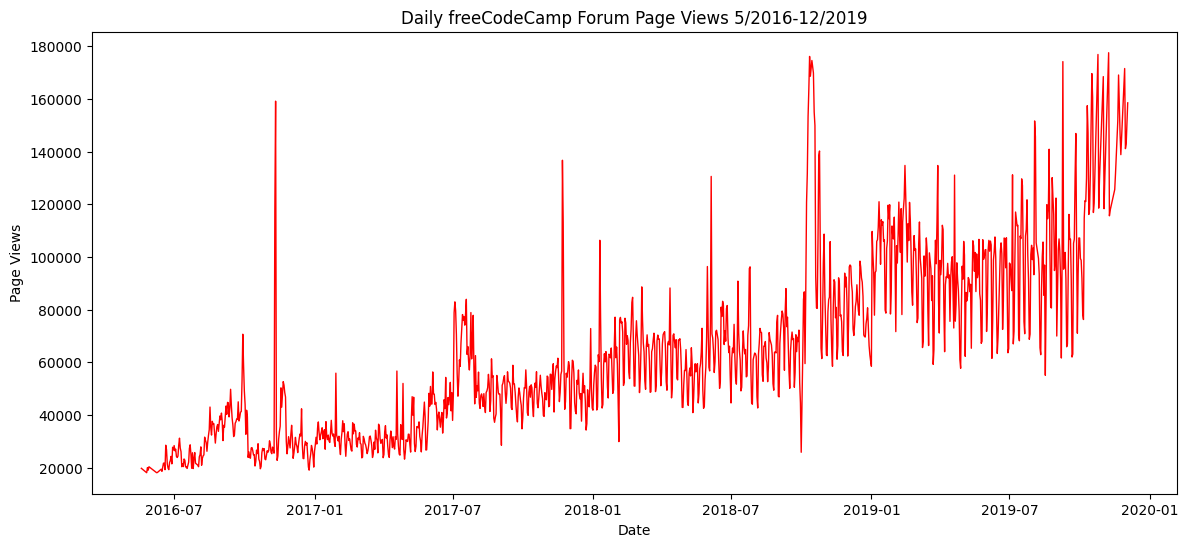

In [2]:
fig1 = draw_line_plot()

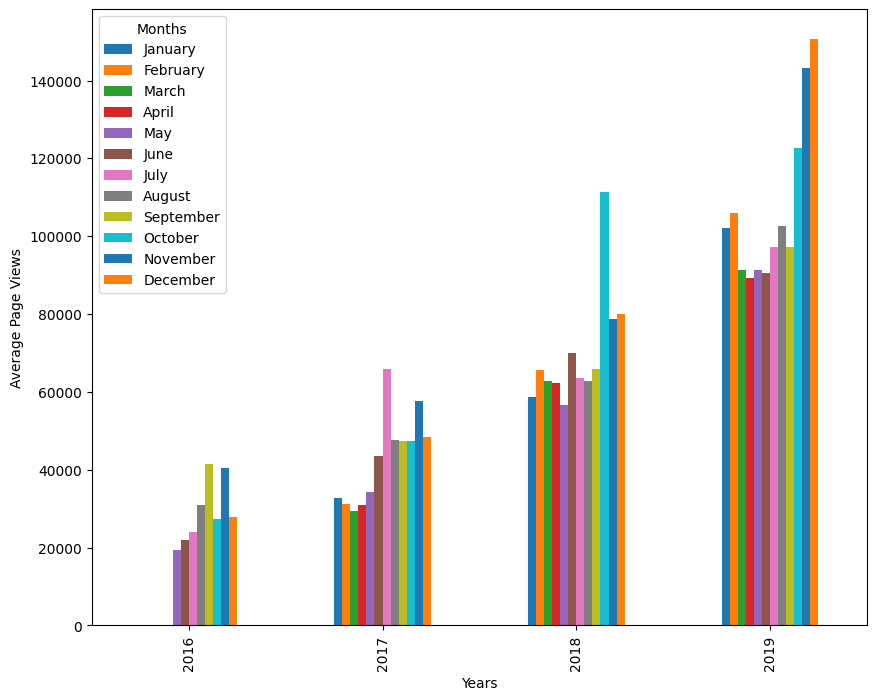

In [3]:
fig2 = draw_bar_plot()

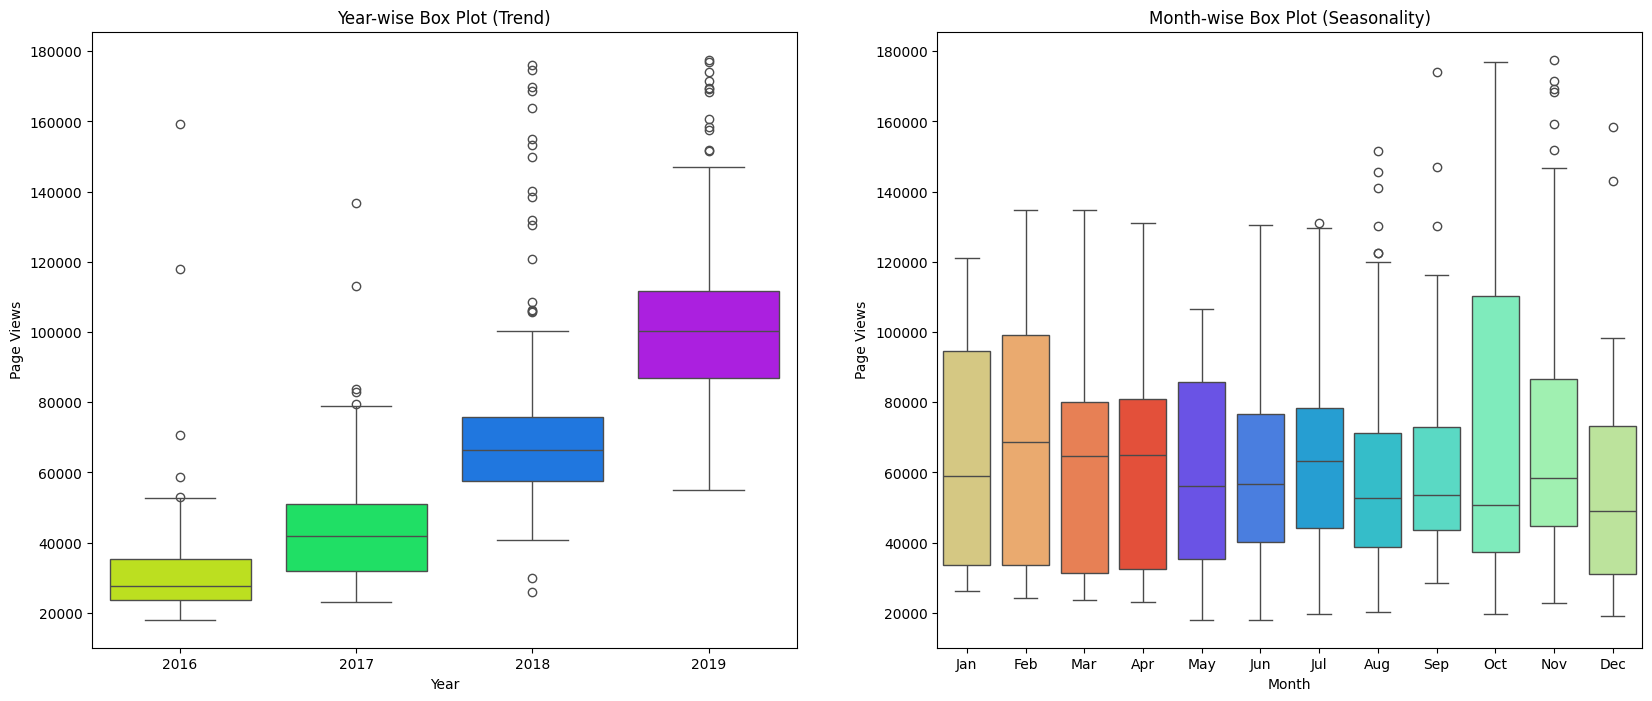

In [4]:
fig3 = draw_box_plot()